# Chapter 3: S-period lived Agent Problem with Exogenous labor Supply

Code is based on OG-USA.

In [1]:
import numpy as np
import time 
import scipy.optimize as opt
from matplotlib import pyplot as plt
import scipy.linalg as la

In [2]:
def get_L(nvec):
    L = np.sum(nvec)
    return L

def get_K(bvec):
    K = np.sum(bvec)
    return K

def get_r(K, L, params):
    alpha, A, delta = params
    r = alpha * A * (L / K) ** (1 - alpha) - delta
    return r
    
def get_w(K, L, params):
    alpha, A = params
    w = (1 - alpha) * A * (K / L) ** alpha
    return w
    
def get_Y(K, L, params):
    alpha, A = params
    Y = A * (K ** alpha) * (L ** (1 - alpha))
    return Y

def get_C(cvec):
    C = np.sum(cvec)
    return C

In [6]:
def get_cons(bvec, args):  
    '''
    bvec: savings of remaining periods of life
    '''
    nvec, r, w = args
    bs = np.append(0.0, bvec)  # because inherit 0 savings when born
    bsp = np.append(bvec, 0.0)  # because leave 0 savings before end of life
    cvec = (1 + r) * bs + w * nvec - bsp
    return cvec

In [7]:
def get_MU_c(cvec, sigma, graph=True):

    MU_c = cvec**(-sigma)
    return MU_c

In [8]:
def get_b_EE(cvec, args):
    
    beta, sigma, r = args
    mu_c = get_MU_c(cvec[:-1], sigma)
    mu_cp = get_MU_c(cvec[1:], sigma)
    
    EE_b_errs = (beta * (1 + r) * mu_cp) - mu_c
    return EE_b_errs

In [9]:
def get_SS_EE(bvec, *args):
    
    nvec, beta, sigma, A, alpha, delta = args
    K = get_K(bvec)
    L = get_L(nvec)
    r_params = (alpha, A, delta)
    r = get_r(K, L, r_params)
    w_params = (alpha, A)
    w = get_w(K, L, w_params)
    c_args = (nvec, r, w)
    cvec = get_cons(bvec, c_args)
    b_args = (beta, sigma, r)
    EE = get_b_EE(cvec, b_args)
    
    return EE

In [10]:
def get_SS_graphs(c_ss, b_ss):
    
    S = len(c_ss)
    b_ss2 = np.append(0.0, b_ss)
    age_pers = np.arange(1, S+1)
    
    plt.plot(age_pers, c_ss, marker='D', label='Consumption')
    plt.grid(b=True, which='major', color='0.65', linestyle='-')
    plt.xlabel(r'Age $s$')
    plt.ylabel(r'Units of consumption')
    plt.xlim((0, S + 1))
    plt.legend(loc='upper left')
    plt.show()
    
    plt.plot(age_pers, b_ss2, marker='D', label='Savings')
    plt.grid(b=True, which='major', color='0.65', linestyle='-')
    plt.xlabel(r'Age $s$')
    plt.ylabel(r'Units of consumption')
    plt.xlim((0, S + 1))
    plt.legend(loc='upper left')
    plt.show()

In [11]:
def get_SS(params, bvec_guess, SS_graphs):
    
    beta, sigma, nvec, L, A, alpha, delta, SS_tol = params
    
    start_time = time.clock()
    
    EE_args = (nvec, beta, sigma, A, alpha, delta)
    results_EE = opt.root(get_SS_EE, bvec_guess, args=EE_args, tol=SS_tol)
    b_ss = results_EE.x
    EulErr_ss = results_EE.fun
    
    K_ss = get_K(b_ss)
    r_params = (alpha, A, delta)
    r_ss = get_r(K_ss, L, r_params)
    w_params = (alpha, A)
    w_ss = get_w(K_ss, L, w_params)
    c_args = (nvec, r_ss, w_ss)
    c_ss = get_cons(b_ss, c_args)
    
    Y_params = (alpha, A)
    Y_ss = get_Y(K_ss, L, Y_params)
    C_ss = get_C(c_ss)
    
    RCerr_ss = Y_ss - C_ss - delta * K_ss
    
    ss_time = time.clock() - start_time
    
    ss_output = {
        'b_ss': b_ss, 
        'c_ss': c_ss, 
        'w_ss': w_ss, 
        'r_ss': r_ss,
        'K_ss': K_ss, 
        'Y_ss': Y_ss, 
        'C_ss': C_ss,
        'EulErr_ss': EulErr_ss,
        'RCerr_ss': RCerr_ss,
        'ss_time': ss_time
    }
    
    if SS_graphs: 
        get_SS_graphs(c_ss, b_ss)
        
    return ss_output

### Part a, b

In [12]:
# parameters for the model
S = 80
beta = 0.96 ** (80 / S)
delta = 1 - (1 - 0.05) ** (80 / S)
sigma = 3
A = 1
alpha = 0.35

s = np.round(2 * S / 3)
nvec1 = np.ones(int(s)) * 1
nvec2 = np.ones(int(S - s)) * 0.2
nvec = np.concatenate((nvec1, nvec2), axis=None)
L = np.sum(nvec)

bvec_guess = np.ones(S - 1) * 0.003
SS_tol = 1e-8
SS_graphs=True

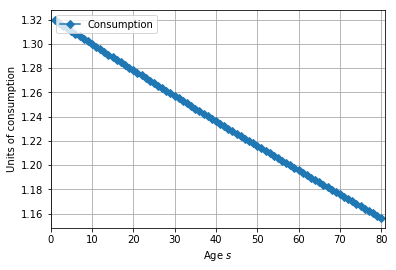

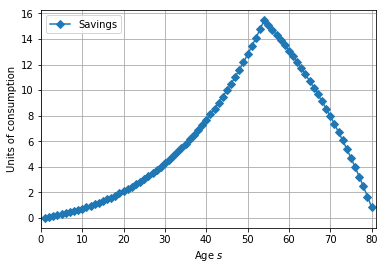

{'b_ss': array([ 0.06051918,  0.12544731,  0.19494149,  0.26916451,  0.34828513,
         0.43247825,  0.52192516,  0.61681377,  0.71733883,  0.82370221,
         0.93611315,  1.05478851,  1.17995308,  1.31183984,  1.45069027,
         1.59675466,  1.75029246,  1.91157252,  2.08087357,  2.25848446,
         2.44470461,  2.63984433,  2.84422528,  3.05818082,  3.28205651,
         3.51621049,  3.76101396,  4.01685167,  4.2841224 ,  4.56323948,
         4.85463131,  5.15874192,  5.47603153,  5.80697714,  6.15207316,
         6.51183203,  6.88678486,  7.27748216,  7.68449449,  8.10841324,
         8.54985135,  9.00944411,  9.48785001,  9.98575151, 10.503856  ,
        11.04289663, 11.6036333 , 12.18685364, 12.79337397, 13.4240404 ,
        14.07972988, 14.76135136, 15.46984691, 15.1021463 , 14.72305542,
        14.33215565, 13.92901307, 13.51317797, 13.08418424, 12.64154879,
        12.1847709 , 11.71333163, 11.2266931 , 10.72429784, 10.20556805,
         9.66990488,  9.11668765,  8.545273

In [13]:
params = (beta, sigma, nvec, L, A, alpha, delta, SS_tol)
get_SS(params, bvec_guess, SS_graphs)

### Part c

In [14]:
# parameters for the model
S = 80
beta = 0.96 ** (80 / S)
delta = 1 - (1 - 0.05) ** (80 / S)
sigma = 3
A = 1
alpha = 0.35

s = np.round(S / 2)
nvec1 = np.ones(int(s)) * 1
nvec2 = np.ones(int(S - s)) * 0.2
nvec = np.concatenate((nvec1, nvec2), axis=None)
L = np.sum(nvec)

bvec_guess = np.ones(S - 1) * 0.003
SS_tol = 1e-8
SS_graphs=True

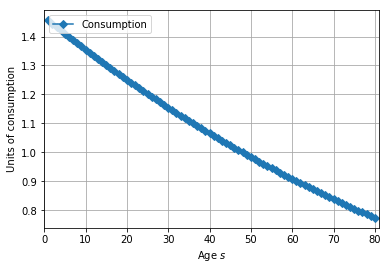

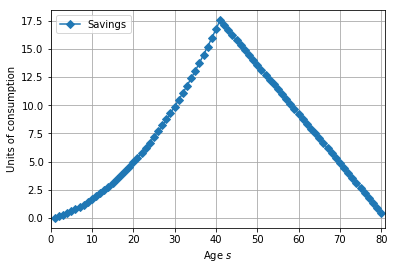

{'b_ss': array([ 0.12750186,  0.26877057,  0.42394716,  0.59317578,  0.77660375,
         0.97438164,  1.18666327,  1.41360578,  1.65536971,  1.91211899,
         2.18402107,  2.47124688,  2.77397098,  3.09237154,  3.42663045,
         3.77693334,  4.14346966,  4.52643272,  4.92601978,  5.34243208,
         5.77587492,  6.22655773,  6.69469412,  7.18050193,  7.68420336,
         8.20602495,  8.74619773,  9.30495725,  9.88254364, 10.47920173,
        11.09518106, 11.73073604, 12.38612593, 13.061615  , 13.75747256,
        14.47397307, 15.2113962 , 15.97002694, 16.75015566, 17.55207821,
        17.10917075, 16.66717719, 16.22604588, 15.78572483, 15.3461617 ,
        14.9073038 , 14.46909804, 14.03149098, 13.59442876, 13.15785715,
        12.72172146, 12.28596662, 11.8505371 , 11.41537693, 10.98042966,
        10.54563841, 10.11094578,  9.67629388,  9.24162434,  8.80687824,
         8.37199614,  7.93691806,  7.50158346,  7.06593121,  6.62989962,
         6.1934264 ,  5.75644864,  5.318902

In [15]:
params = (beta, sigma, nvec, L, A, alpha, delta, SS_tol)
get_SS(params, bvec_guess, SS_graphs)

### Comment

- Affect on steady state consumption: Households retire sooner so consumption is lower for older age groups. 

- Affect on steady state savings: Shifts to the left when households retire sooner because they need to save earlier to maintain sustainable future consumption (consumption smoothening).

- Affect on steady state wage: Overall workers in economy decline when housholds retire sooner. Therefore, there is less supply of labor making the steady state wage to increase for market clearance. 

- Affect on steady state interest rate: Since households are more willing to save (save earlier) there is more supply of savings and thus interest rate decreases. 